# DF Implementation

#### Setting Directory to show code reusability

In [0]:
# To show code reusability, you can enter any of the year (2023, 2021, 2020) of the clinical trial dataset

year = 2023
file = 'clinicaltrial_' + str(year)
pharma = 'pharma'

#### Loading any clinical trial dataset

In [0]:
# Reading the clinical trial file from the path
clinical_trial = sc.textFile("/FileStore/tables/" + file + ".csv")
header = clinical_trial.first()
clinical_trial = clinical_trial.filter(lambda y: y != header)

In [0]:
# Replacing the dataset containing irregular expression with an empty string
# And also spliting with the delimiters
clinical_trial_RDD = clinical_trial.map(lambda x: x.replace('"', '') \
                                                    .replace(',', '') \
                                                    .split('\t') if len(x.split('\t')) == 14 else x.replace('"', '').split('|'))

In [0]:
# Define a function to fix the length of each row in the RDD to match a specified length
def fix_row_length(row, length):
    return row + [None] * (length - len(row))
    
def process_rdd_based_on_length(rdd):
    length = len(rdd.first())
    if length == 14:
        return rdd.map(lambda row: fix_row_length(row, 14))
    elif length == 9:
        return rdd.map(lambda row: fix_row_length(row, 9))
    else:
        raise ValueError("Unexpected row length: {}".format(length))

In [0]:
clinical_trial_RDD = process_rdd_based_on_length(clinical_trial_RDD)

In [0]:
from pyspark.sql.types import StructType, StructField, StringType

# Defining the schemas for the dataset
schema_1 = StructType([
    StructField("Id", StringType(), True),
    StructField("Study_Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),
    StructField("Funder_Type", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Study_Design", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True)
])

schema_2 = StructType([
    StructField("Id", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Submission", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True)
])

In [0]:
# Geting the length of the first row in the RDD
row_len = len(clinical_trial_RDD.first())

# Defining the schema based on the row length
selected_schema = schema_1 if row_len == 14 else schema_2

# Creating a dataframe from the selected schema and the RDD
clinical_trial_df = spark.createDataFrame(clinical_trial_RDD, selected_schema)

In [0]:
clinical_trial_df.show(5)

+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study_Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder_Type|          Type|        Study_Design|     Start|Completion|
+-----------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangath|Harvard Medical S...|     250.0|      OTHER|INTERVENTIONAL|Allocation: RANDO...|2018-08-20|2019-02-28|
|NCT05992571|Oral Ketone Monoe...|          |        RECRUITING|Cerebrovascular 

#### Loading the "pharma.csv" dataset

In [0]:
# Reading the pharma.csv file from the directory using the spark_session
pharma_df = spark\
        .read.options(delimiter = ",")\
        .csv("/FileStore/tables/" + pharma + ".csv", header = True, inferSchema = True)

In [0]:
# Displaying properly with display() method
display(pharma_df)

Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes
Abbott Laboratories,Abbott Laboratories,"$5,475,000",$0,"$5,475,000",2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,null
Abbott Laboratories Inc.,AbbVie,"$1,500,000,000",$0,"$1,500,000,000",2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,null,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors.,federal,agency action,Food and Drug Administration referral to the Justice Department,civil and criminal,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote,null
Abbott Laboratories Inc.,AbbVie,"$126,500,000",$0,"$126,500,000",2010,20101207,government-contracting-related offenses,False Claims Act and related,null,"Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations, that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates.",federal,agency action,Justice Department Civil Division,civil,null,null,null,null,null,null,null,null,null,null,null,USA,Illinois,publicly traded,ABBV,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases,null
"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories,"$49,045",$0,"$49,045",2009,20090305,employment-related offenses,wage and hour violation,Fair Labor Standards Act,null,federal,agency action,Labor Department Wage and Hour Division,civil,null,null,1527129,null,null,Puerto Rico,San Juan,null,null,423450,"423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers",USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,"March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php","Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide ca

In [0]:
pharma_df.show()

+--------------------+--------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+---------------+-----------------------------+------------------+--------------+------------+--------------------+-----+----------+--------------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+--------------------+
|             Company|      Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    C

### QUESTION AND ANSWER

In [0]:
# Importing the library
import matplotlib.pyplot as plt
import calendar
from pyspark.sql import functions as F
from pyspark.sql.functions import col, split

#### QUESTION 1
The number of studies in the dataset. You must ensure that you explicitly check distinct studies.

In [0]:
# Count the number of distinct studies in the DataFrame
num_of_studies = clinical_trial_df.select("Id") \
                                        .distinct() \
                                        .count()

print(f"Number of studies in {year}:", num_of_studies)

Number of studies in 2023: 483422


#### QUESTION 2
You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
# Extracting types and mapping them to key-value pairs with initial count 1
type_counts = (clinical_trial_df
               .filter((col("Type").isNotNull()) & (col("Type") != ""))
               .groupBy("Type")
               .count()
               .orderBy("count", ascending=False))

# Collecting and printing the results
type_counts.show(truncate = False)

+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371382|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
+---------------+------+



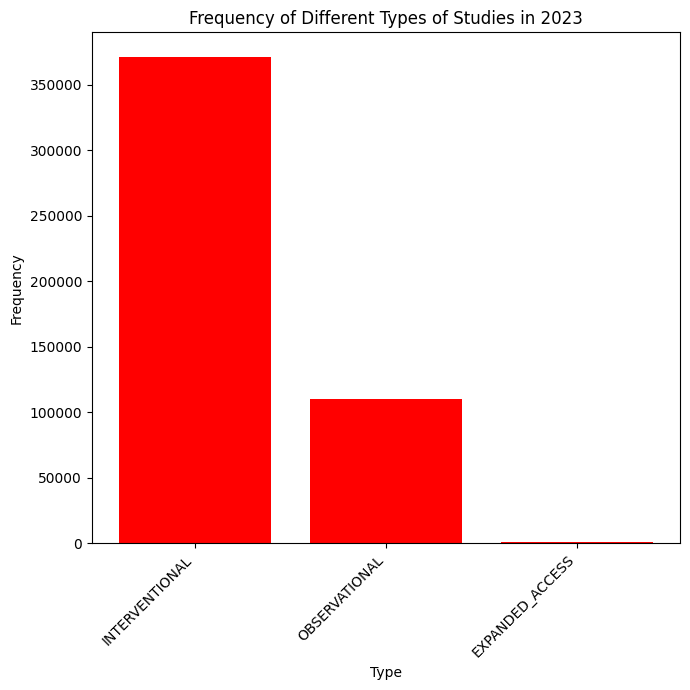

In [0]:
# Extracting type names and frequencies
type_counts_df = type_counts.toPandas()
typ = type_counts_df["Type"].tolist()
freq = type_counts_df["count"].tolist()

# Plotting the bar chart
plt.figure(figsize=(7, 7))
plt.bar(typ, freq, color='red')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title(f'Frequency of Different Types of Studies in {year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### QUESTION 3
The top 5 conditions (from Conditions) with their frequencies.

In [0]:
# Grouping by "Conditions", counting occurrences, and sorting by frequency in descending order
top_5_cond = (clinical_trial_df
              .filter(col("Conditions").isNotNull())
              .groupBy("Conditions")
              .count()
              .orderBy("count", ascending=False)
              .limit(5))

# Collect and print the results
top_5_cond.show(truncate = False)

+---------------+-----+
|Conditions     |count|
+---------------+-----+
|Healthy        |7997 |
|Breast Cancer  |4556 |
|Prostate Cancer|2650 |
|Asthma         |2309 |
|Obesity        |2284 |
+---------------+-----+



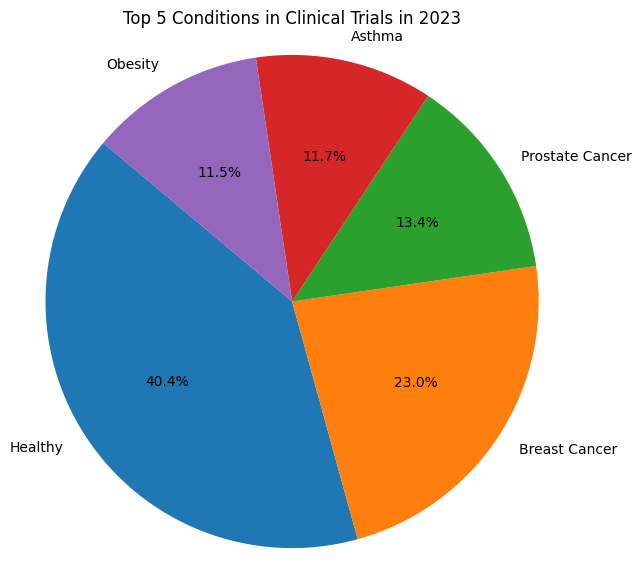

In [0]:
# Extracting conditions names and frequencies
top_5_cond_df = top_5_cond.toPandas()
cond = top_5_cond_df["Conditions"].tolist()
freq = top_5_cond_df["count"].tolist()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(freq, labels = cond, autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title(f'Top 5 Conditions in Clinical Trials in {year}')
plt.show()

#### QUESTION 4
Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the Parent Company column contains all possible pharmaceutical companies.

In [0]:
# Filter out pharmaceutical sponsors
spons_counts = (clinical_trial_df
                .join(pharma_df, clinical_trial_df["Sponsor"] == pharma_df["Company"], "left_anti")
                .groupBy("Sponsor")
                .count()
                .orderBy("count", ascending=False)
                .limit(10))

# Printing the results
spons_counts.show(truncate = False)

+-------------------------------------------------------------+-----+
|Sponsor                                                      |count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
|Hoffmann-La Roche                                            |1978 |
+-------------------------------------------------------------+-----+



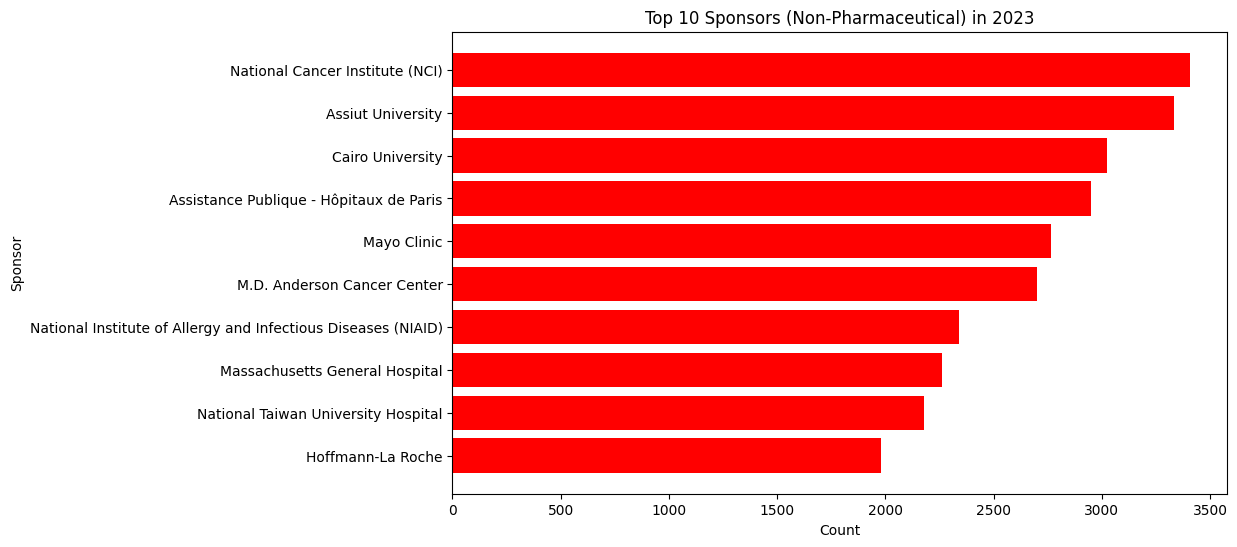

In [0]:
# Extracting names and counts
spons_counts_df = spons_counts.toPandas()
spons = spons_counts_df["Sponsor"].tolist()
count = spons_counts_df["count"].tolist()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(spons, count, color='red')
plt.xlabel('Count')
plt.ylabel('Sponsor')
plt.title(f'Top 10 Sponsors (Non-Pharmaceutical) in {year}')
plt.gca().invert_yaxis()
plt.show()

#### QUESTION 5
Plot number of completed studies for each month in 2023. You need to include your visualization as well as a table of all the values you have plotted for each month.

In [0]:
def plot_completed_studies(clinical_trial_df, year):
    try:
        # Filter completed studies in the extracted year with non-null completion dates
        completed_studies = clinical_trial_df.filter((F.col('Status') == 'COMPLETED') & \
                                      (F.col('Completion').isNotNull()) & \
                                      (F.year('Completion') == year))

        # Extract month from completion date and map to key-value pairs
        monthly_counts = completed_studies \
            .withColumn('Month', F.month('Completion')) \
            .groupBy('Month') \
            .count() \
            .orderBy('Month') \
            .collect()

        if not monthly_counts:
            print(f"No completed studies found for the year {year}")
            return None, None

        # Convert month numbers to month names
        month_names = [calendar.month_name[month.Month] for month in monthly_counts]

        # Extracting data for table
        counts = [month['count'] for month in monthly_counts]

        # Plotting the bar chart
        plt.figure(figsize=(11, 8))
        plt.bar(month_names, counts, color='red')
        plt.xlabel('Month')
        plt.ylabel('Number of Completed Studies')
        plt.title(f'Number of Completed Studies for Each Month in {year}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return month_names, counts

    except Exception as e:
        print("")
        return None, None

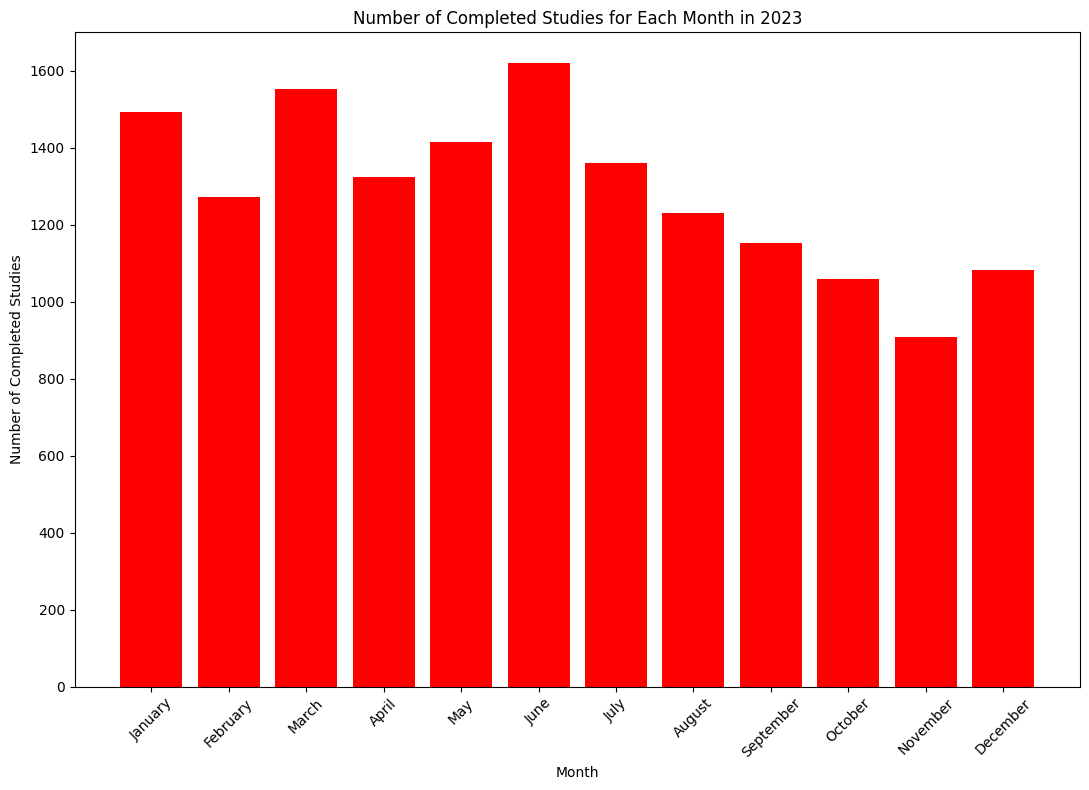

Monthly Counts:
----------------
January: 1494
February: 1272
March: 1552
April: 1324
May: 1415
June: 1619
July: 1360
August: 1230
September: 1152
October: 1058
November: 909
December: 1082


In [0]:
# Call the function
month_names, counts = plot_completed_studies(clinical_trial_df, year)

# Displaying table with month names
if month_names:
    print("Monthly Counts:")
    print("----------------")
    for month_name, count in zip(month_names, counts):
        print(f"{month_name}: {count}")

#### FURTHER ANALYSIS
Identify the sponsors count by Level of Government

In [0]:
govt_spons_count = (clinical_trial_df
                            .join(pharma_df, clinical_trial_df["Sponsor"] == pharma_df["Company"], "inner")
                            .groupBy("Level_of_Government")
                            .agg(F.countDistinct('Sponsor').alias('Sponsors_Count'))
                            .orderBy('Sponsors_Count', ascending=False))

# Show the result
govt_spons_count.show()

+-------------------+--------------+
|Level_of_Government|Sponsors_Count|
+-------------------+--------------+
|            federal|            34|
|              state|            32|
|              local|             1|
+-------------------+--------------+



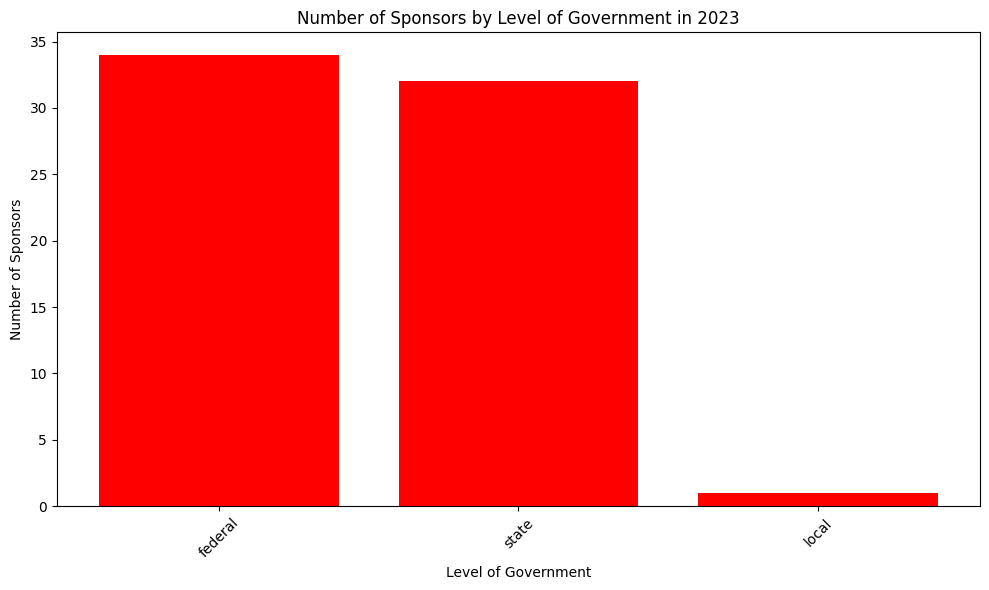

In [0]:
govt_spons_pd = govt_spons_count.toPandas()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(govt_spons_pd['Level_of_Government'], govt_spons_pd['Sponsors_Count'], color='red')
plt.xlabel('Level of Government')
plt.ylabel('Number of Sponsors')
plt.title(f'Number of Sponsors by Level of Government in {year}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()